##Procedimentos preliminares

Primeiramente é necessário importar as bibliotecas utilizadas para a execução do código e carregar os arquivos com as bases de dados disponíveis na pasta 'Dados' do projeto.

In [4]:
## IMPORTANDO AS BIBLIOTECAS ##

import pandas as pd

In [5]:
## CARREGANDO AS DATABASES ##

url_experimentos = 'https://github.com/gusrocker/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
url_resultados = 'https://github.com/gusrocker/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

experimentos = pd.read_csv(url_experimentos, compression = 'zip') # Arquivo .zip
resultados = pd.read_csv(url_resultados) # Arquivo .csv

##Entendendo os dados

Com os arquivos carregados, é possível dar uma olhada nas tabelas para entender melhor quais dados estão disponíveis e que tipo de análises podem ser feitas a partir deles.

In [ ]:
## TAMANHO DA TABELA DE EXPERIMENTOS ##

experimentos.shape

(23814, 877)

In [ ]:
## AMOSTRA DA TABELA DE EXPERIMENTOS ##

experimentos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


>A tabela de experimentos possui 23814 linhas e 877 colunas, ou seja, 23814 experimentos com 877 variáveis cada.

>Ao exibir as primeiras linhas da tabela, pode-se observar como os dados estão organizados. Cada linha da tabela representa um experimento que é identificado com um código 'id'. Em cada experimento, uma amostra recebe um 'tratamento' por um período de 'tempo' com determinada 'dose' de alguma 'droga', provocando reações nas expressões genéticas dos genes observados (g's) e nas viabilidades celulares das células observadas (c's).

>Devido à grande quantidade de colunas na tabela, precisamos de um passo adicional para verificar a quantidade de genes e células:

In [ ]:
## CONTANDO AS COLUNAS DE GENES ##

len([col for col in experimentos.columns if 'g-' in col])

772

In [ ]:
## CONTANDO AS COLUNAS DE CÉLULAS ##

len([col for col in experimentos.columns if 'c-' in col])

100

>Portanto, a tabela possui 772 genes ('g-0' a 'g-771') e 100 células ('c-0' a 'c-99'). E os valores contidos nessas colunas são as medições de expressão genética e viabilidade celular para cada experimento.

>Conhecendo as colunas, podem ser verificadas mais informações sobre seus dados:

In [ ]:
## CONTANDO OS VALORES DE ID ##

len(experimentos['id'].unique())

23814

>A coluna 'id' deve possuir códigos de identificação únicos para cada experimento, portanto é possível confirmar a presença de 23814 valores únicos qué é o mesmo valor da quantidade de experimentos.

In [ ]:
## CONTANDO OS VALORES DE TRATAMENTO ##

experimentos['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

>Pode-se perceber que a coluna 'tratamento' possui dois valores, indicando se o experimento recebeu o tratamento de alguma droga ('com_droga') ou se foi um experimento de controle ('com_controle').

In [ ]:
## CONTANDO OS VALORES DE TEMPO ##

experimentos['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

>Já a coluna 'tempo' possui três valores, indicando experimentos de 24 horas, 48 horas e 72 horas.

In [ ]:
## CONTANDO OS VALORES DE DOSE ##

experimentos['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

>A coluna 'dose' mostra que foram utilizadas dois tipos de dosagem para as drogas aplicadas ('D1' e 'D2').

In [ ]:
## CONTANDO OS VALORES DE DROGA ##

experimentos['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
d9fcbe12c       1
82dcdb180       1
98c4c858e       1
73aa9f9ff       1
bef38f2fd       1
Name: droga, Length: 3289, dtype: int64

>E a coluna 'droga' mostra que foram testadas 3289 drogas diferentes, cada uma indicada por um código. Enquanto algumas foram testadas centenas de vezes, outras foram testadas apenas uma vez.

>Pode-se notar que a droga identificada pelo código 'cacb2b860' foi utilizada em 1866 experimentos, sendo o mesmo número de experimentos de controle, conforme a contagem da coluna 'tratamento'. É possível verificar se essa droga foi utilizada em todos os experimentos de controle:

In [ ]:
## CONTANDO OS VALORES DE DROGA NOS EXPERIMENTOS DE CONTROLE ##

experimentos[experimentos['tratamento'] == 'com_controle']['droga'].value_counts()

cacb2b860    1866
Name: droga, dtype: int64

In [ ]:
## CONTANDO OS VALORES DE TRATAMENTO NOS EXPERIMENTOS COM UMA DROGA ESPECÍFICA ##

experimentos[experimentos['droga'] == 'cacb2b860']['tratamento'].value_counts()

com_controle    1866
Name: tratamento, dtype: int64

>Sim, filtrando os experimentos de controle, 'cacb2b860' é a única droga que aparece. Da mesma forma, filtrando os experimentos que utilizaram essa droga, só aparecem experimentos de controle. Isso sugere que a droga 'cacb2b860' parece ter sido utilizada como um tipo de placebo, cuja aplicação devidamente aleatorizada permite formar um grupo de controle no qual são medidas as expressões genéticas e viabilidades celulares sem o efeito de drogas. Dessa forma, é possível comparar as medições das demais drogas com a medição de controle, determinando o efeito do tratamento de cada droga em cada gene e célula.

Pode-se observar também a tabela de resultados:

In [ ]:
## TAMANHO DA TABELA DE RESULTADOS ##

resultados.shape

(23814, 207)

In [ ]:
## AMOSTRA DA TABELA DE RESULTADOS ##

resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


>A tabela de resultados possui a mesma quantidade de linhas da tabela de experimentos, porém com variáveis diferentes, que são os mecanismos de ação das drogas. A primeira coluna também possui um 'id' que parece estar relacionado ao 'id' da tabela de experimentos. Essa relação pode ser verificada, comparando-se as duas colunas:

In [ ]:
## COMPARANDO OS ID'S DAS DUAS TABELAS ##

(experimentos['id']==resultados['id']).value_counts()

True    23814
Name: id, dtype: int64

>Com todos os valores 'True', confirma-se que os id's são iguais.

>Já para as demais colunas, percebe-se a presença de vários valores iguais a zero. Para entender melhor esses valores, é possível fazer algumas verificações:

In [ ]:
## DESCREVER DADOS ESTATÍSTICOS DOS VALORES ##

resultados.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.00000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,0.015117,0.002771,0.000294,0.001764,0.000504,0.000504,0.002016,0.003737,0.003359,0.001512,0.001554,0.003065,0.000252,0.001806,0.000504,0.000546,0.000504,0.000756,0.003065,0.001512,0.000966,0.002058,0.001974,0.000252,0.000042,0.000504,0.004073,0.000798,0.004031,0.000252,...,0.004325,0.000798,0.002352,0.009364,0.000504,0.002813,0.000252,0.00147,0.001554,0.001050,0.009910,0.016965,0.001848,0.001512,0.001512,0.001050,0.011212,0.001050,0.002981,0.000252,0.000798,0.002520,0.001260,0.000798,0.001554,0.001260,0.000294,0.001512,0.005333,0.000756,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,0.122022,0.052573,0.017143,0.041960,0.022443,0.022443,0.044851,0.061020,0.057864,0.038852,0.039387,0.055283,0.015871,0.042456,0.022443,0.023359,0.022443,0.027483,0.055283,0.038852,0.031063,0.045315,0.044383,0.015871,0.006480,0.022443,0.063693,0.028236,0.063365,0.015871,...,0.065625,0.028236,0.048437,0.096317,0.022

In [ ]:
## VERIFICAR O VALOR MÍNIMO ##

resultados.drop(['id'], axis=1).min().min()

0

In [ ]:
## VERIFICAR O VALOR MÁXIMO ##

resultados.drop(['id'], axis=1).max().max()

1

>Pode-se notar que os valores são do tipo 0 ou 1, representando quando cada mecanismo foi (1) ou não (0) ativado.

##Analisando os dados

Conhecendo os dados, é possível realizar análises para investigar padrões e possíveis abordagens para a proposta de estudos.

Uma visualização interessante é observar para um gene qualquer a diferença das expressões genéticas dos experimentos com e sem drogas:

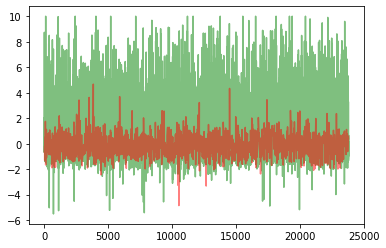

In [6]:
## EXPRESSÕES GENÉTICAS NO GENE 'G-0' NOS EXPERIMENTOS COM DROGA (VERDE) E SEM DROGA (VERMELHO) ##

experimentos[experimentos['tratamento'] == 'com_droga']['g-0'].head(21948).plot.line(color='green', alpha=.5)
experimentos[experimentos['tratamento'] == 'com_controle']['g-0'].head(1866).plot.line(color='red', alpha=.5)